In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv("../data/7_64points.txt")

In [4]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [5]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(7509, 7)

In [6]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [7]:
X_train = X_train.reshape(X_train.shape[0],8,8)

In [8]:
for graph in X_train:
    for i in range(8):
        m = max(graph[i])
        for j in range(8):
            graph[i][j] = graph[i][j]/m

In [9]:
classifier = Sequential()

classifier.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
classifier.add(Dropout(0.5))

classifier.add(LSTM(units = 50))
classifier.add(Dropout(0.5))


classifier.add(Dense(units = 64))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 7, activation="softmax"))

In [10]:
mcp_save = ModelCheckpoint("../Data/Modern4LSTM.h5", save_best_only=True, monitor='val_acc', mode='max')
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [11]:
history = classifier.fit(X_train, Y_train,validation_split=0.2, epochs = 50, batch_size = 16, verbose=2,callbacks=[mcp_save])

Train on 6007 samples, validate on 1502 samples
Epoch 1/50
 - 3s - loss: 0.2149 - accuracy: 0.9105 - val_loss: 0.1503 - val_accuracy: 0.9383
Epoch 2/50


C:\Users\Denis\Anaconda3\envs\myo\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 2s - loss: 0.1548 - accuracy: 0.9338 - val_loss: 0.1336 - val_accuracy: 0.9441
Epoch 3/50
 - 2s - loss: 0.1469 - accuracy: 0.9377 - val_loss: 0.1335 - val_accuracy: 0.9445
Epoch 4/50
 - 2s - loss: 0.1411 - accuracy: 0.9405 - val_loss: 0.1199 - val_accuracy: 0.9486
Epoch 5/50
 - 2s - loss: 0.1372 - accuracy: 0.9418 - val_loss: 0.1280 - val_accuracy: 0.9476
Epoch 6/50
 - 2s - loss: 0.1357 - accuracy: 0.9422 - val_loss: 0.1193 - val_accuracy: 0.9511
Epoch 7/50
 - 2s - loss: 0.1315 - accuracy: 0.9439 - val_loss: 0.1250 - val_accuracy: 0.9485
Epoch 8/50
 - 2s - loss: 0.1321 - accuracy: 0.9440 - val_loss: 0.1205 - val_accuracy: 0.9501
Epoch 9/50
 - 3s - loss: 0.1287 - accuracy: 0.9459 - val_loss: 0.1197 - val_accuracy: 0.9507
Epoch 10/50
 - 2s - loss: 0.1273 - accuracy: 0.9462 - val_loss: 0.1164 - val_accuracy: 0.9514
Epoch 11/50
 - 3s - loss: 0.1268 - accuracy: 0.9466 - val_loss: 0.1225 - val_accuracy: 0.9491
Epoch 12/50
 - 3s - loss: 0.1259 - accuracy: 0.9463 - val_loss: 0.1158 - val_ac

Text(0.5, 0, 'Training duration, [epochs]')

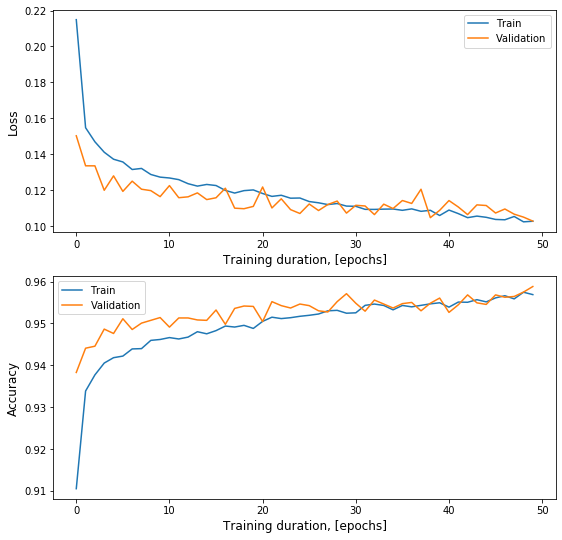

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 12)
plt.xlabel("Training duration, [epochs]",fontsize = 12)
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 12)
plt.xlabel("Training duration, [epochs]",fontsize = 12)

In [25]:
print(classifier.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 8, 50)             11800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                